<a href="https://colab.research.google.com/github/Khushico/ML/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview:
          city  cgpa     iq  placement
0     New York   6.8  123.0          1
1  Los Angeles   5.9  106.0          0
2      Chicago   NaN  121.0          0
3     New York   7.4  132.0          1
4  Los Angeles   5.8  142.0          0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       100 non-null    object 
 1   cgpa       92 non-null     float64
 2   iq         96 non-null     float64
 3   placement  100 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ KB
None

Model Evaluation:
Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90     

<ipython-input-1-6ef0a8499785>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["city"] = X["city"].astype("category").cat.codes


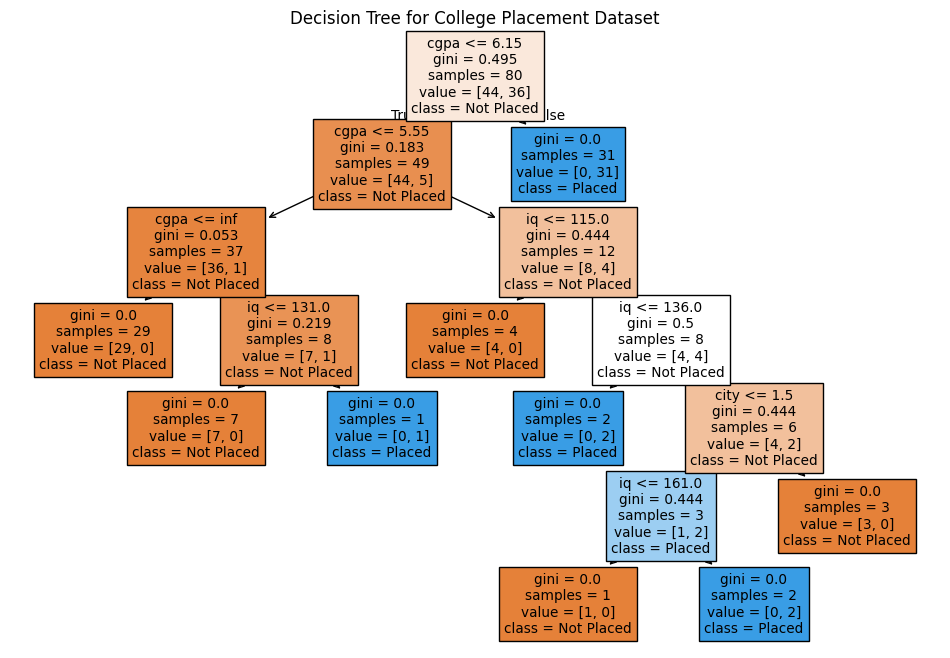

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
path = "/content/placement-dataset.csv"  # Correct path to the dataset
data = pd.read_csv(path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Analyze dataset structure
print("\nDataset Info:")
print(data.info())

# Define features (X) and target (y)
X = data[["city", "cgpa" ,"iq"]]  # Features: 'city' and 'cgpa'
y = data["placement"]          # Target: 'placed'

# Encode categorical variable 'city' (if it's not numeric)
if not pd.api.types.is_numeric_dtype(X["city"]):
    X["city"] = X["city"].astype("category").cat.codes

# Encode target variable 'placed' (if it's not numeric)
if not pd.api.types.is_numeric_dtype(y):
    y = y.astype("category").cat.codes

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=X.columns, class_names=["Not Placed", "Placed"], filled=True)
plt.title("Decision Tree for College Placement Dataset")
plt.show()

SVM Classification Accuracy: 100.00%


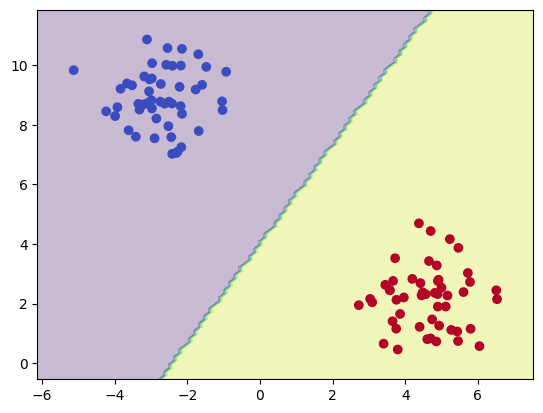

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generate synthetic data
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Classification Accuracy: {accuracy * 100:.2f}%")

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.show()

plot_decision_boundary(X, y, svm_model)


# New Section